### Goldsmiths University of London
### Authors...: Sandor Kanda (skand001) + Carlos Alves (cdeol003)
### Created...: 13/02/2023

### Github repo URL: https://github.com/carlos-alves-one/ML-Coursework.git

## The Task:

The task is based on an energy efficiency prediction problem which is a regression problem. 
More specifically, you are required to perform an analysis using different building shapes, 
with different characteristics, and predict the heating load of the building. 
The buildings differ with respect to the glazing area, the glazing area distribution, the 
orientation, and other aspects comprised in the dataset.
The dataset (below) for this task includes 9 features, denoted by X0, X1, ..., X8, and an 
outcome variable Y which needs to be predicted. 

#### The dataset contains missing values. Here is the meaning of the 10 variables:

X0: Category of the building
X1: Relative Compactness
X2: Surface Area
X3: Wall Area
X4: Roof Area
X5: Overall Height
X6: Orientation
X7: Glazing Area
X8: Glazing Area Distribution

Y: Heating Load

#### You are required to perform this analysis comprising: 
 
#### 2. Data preprocessing including data splitting in 70% training data, and 30% test data, 
#### 3. Data transformations you consider useful for this task, 
#### 3.1. Treatment of missing values, 
#### 3.2. Feature selection if you consider it useful for helping you achieve a better performance, etc. 

#### The analysis should include developing the predictive models based on the following algorithms already studied in this module, or that are going to be studied such as neural networks: 
#### 1. Simple Linear Regression, 
#### 2. Ridge Regression, 
#### 3. Lasso Regression, 
#### 4. Elastic Net Regression, 
#### 5. Polynomial Regression with regularisation, 
#### 6. Neural Network. 

#### These models (except simple Linear Regression which needs only to be simply trained) will be:
#### 1. Tuned using the training set. 
#### 2. The training set will be used to select the best 2 models. 
#### 3. Only these 2 best models will be evaluated on the test set. 

#### The code, comments and explanations will be provided in a Python Jupyter notebook, which should include also the results of running your notebook.

# Setup

In [42]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Machine Learning Coursework"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#### 1. Module Imports

In [43]:
# Import relevant libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 2. Data Acquisition and printing the 1st five rows


In [44]:
import pandas as pd

# load the dataset
df = pd.read_csv('datcw_na.csv', encoding='ISO-8859-1')

# remove unicode characters from column name
df = df.rename(columns=lambda x: x.replace('\u00ca', ''))

# change the column names to actual variable names
df = df.rename(columns={ 'X0': 'Category of the Building',
                         'X1': 'Relative Compactness',
                         'X2': 'Surface Area',
                         'X3': 'Wall Area',
                         'X4': 'Roof Area',
                         'X5': 'Overall Height',
                         'X6': 'Orientation',
                         'X7': 'Glazing Area',
                         'X8': 'Glazing Area Distribution',
                         'Y':  'Heating Load'})


# save the updated dataset
df.to_csv('datcw_na.csv_', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'datcw_na.csv'

In [ ]:
# Import the dataset for the project
dataset = pd.read_csv('datcw_na.csv_')

# Check the dataset for the first 5 rows
dataset.head()


,Category of the building,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Category of the building   768 non-null    object 
 1   Relative Compactness       768 non-null    float64
 2   Surface Area               768 non-null    float64
 3   Wall Area                  728 non-null    float64
 4   Roof Area                  768 non-null    float64
 5   Overall Height             768 non-null    float64
 6   Orientation                768 non-null    float64
 7   Glazing Area               768 non-null    float64
 8   Glazing Area Distribution  768 non-null    float64
 9   Heating Load               768 non-null    float64
dtypes: float64(9), object(1)
memory usage: 60.1+ KB


In [ ]:
# here's useful description of the data counts and distributions of variables
dataset.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
count,768.000000,768.000000,728.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.763516,666.768997,321.102527,176.564141,5.229766,3.527331,0.237852,2.803737,22.307201
std,0.147093,120.863329,60.479340,51.280618,1.844813,1.245710,0.139736,1.597817,10.090196
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.650000,575.510000,277.830000,132.300000,3.470000,2.427500,0.100000,1.517500,12.992500
50%,0.750000,661.500000,315.320000,178.235000,4.955000,3.600000,0.240000,2.970000,18.950000
75%,0.860000,741.130000,355.740000,218.300000,6.930000,4.425000,0.360000,3.960000,31.667500
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


### 3. Data Cleanup

#### 3.1 Finding Missing Values

In [ ]:
# Checking the data with missing values.
sample_incomplete_rows = dataset[dataset.isnull().any(axis=1)].head()
sample_incomplete_rows


,Category of the building,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.00,0.00,15.55
34,C1,0.68,661.50,NaN,178.60,3.47,4.40,0.00,0.00,6.77
88,C2,0.64,776.16,NaN,242.55,3.85,1.80,0.10,1.10,15.41
121,C3,0.73,617.40,NaN,218.30,3.47,2.43,0.09,2.00,10.46
168,C1,0.67,754.60,NaN,242.55,3.47,1.98,0.11,2.43,10.39


#### 3.2 Computing Empty Values


In [ ]:
missing_values= dataset.isnull().sum()
print(missing_values)

Category of the building      0
Relative Compactness          0
Surface Area                  0
Wall Area                    40
Roof Area                     0
Overall Height                0
Orientation                   0
Glazing Area                  0
Glazing Area Distribution     0
Heating Load                  0
dtype: int64


#### 3.3 Computing Median Values, and replace empty values with Median values

In [ ]:
median = dataset["Wall Area"].median()
sample_incomplete_rows["Wall Area"].fillna(median, inplace=True)

In [45]:
sample_incomplete_rows

,Category of the building,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,C3,1.19,622.55,315.32,89.31,7.00,1.98,0.00,0.00,15.55
34,C1,0.68,661.50,315.32,178.60,3.47,4.40,0.00,0.00,6.77
88,C2,0.64,776.16,315.32,242.55,3.85,1.80,0.10,1.10,15.41
121,C3,0.73,617.40,315.32,218.30,3.47,2.43,0.09,2.00,10.46
168,C1,0.67,754.60,315.32,242.55,3.47,1.98,0.11,2.43,10.39


#### 3.4 Visualising the pre-procesed data

Saving figure attribute_histogram_plots


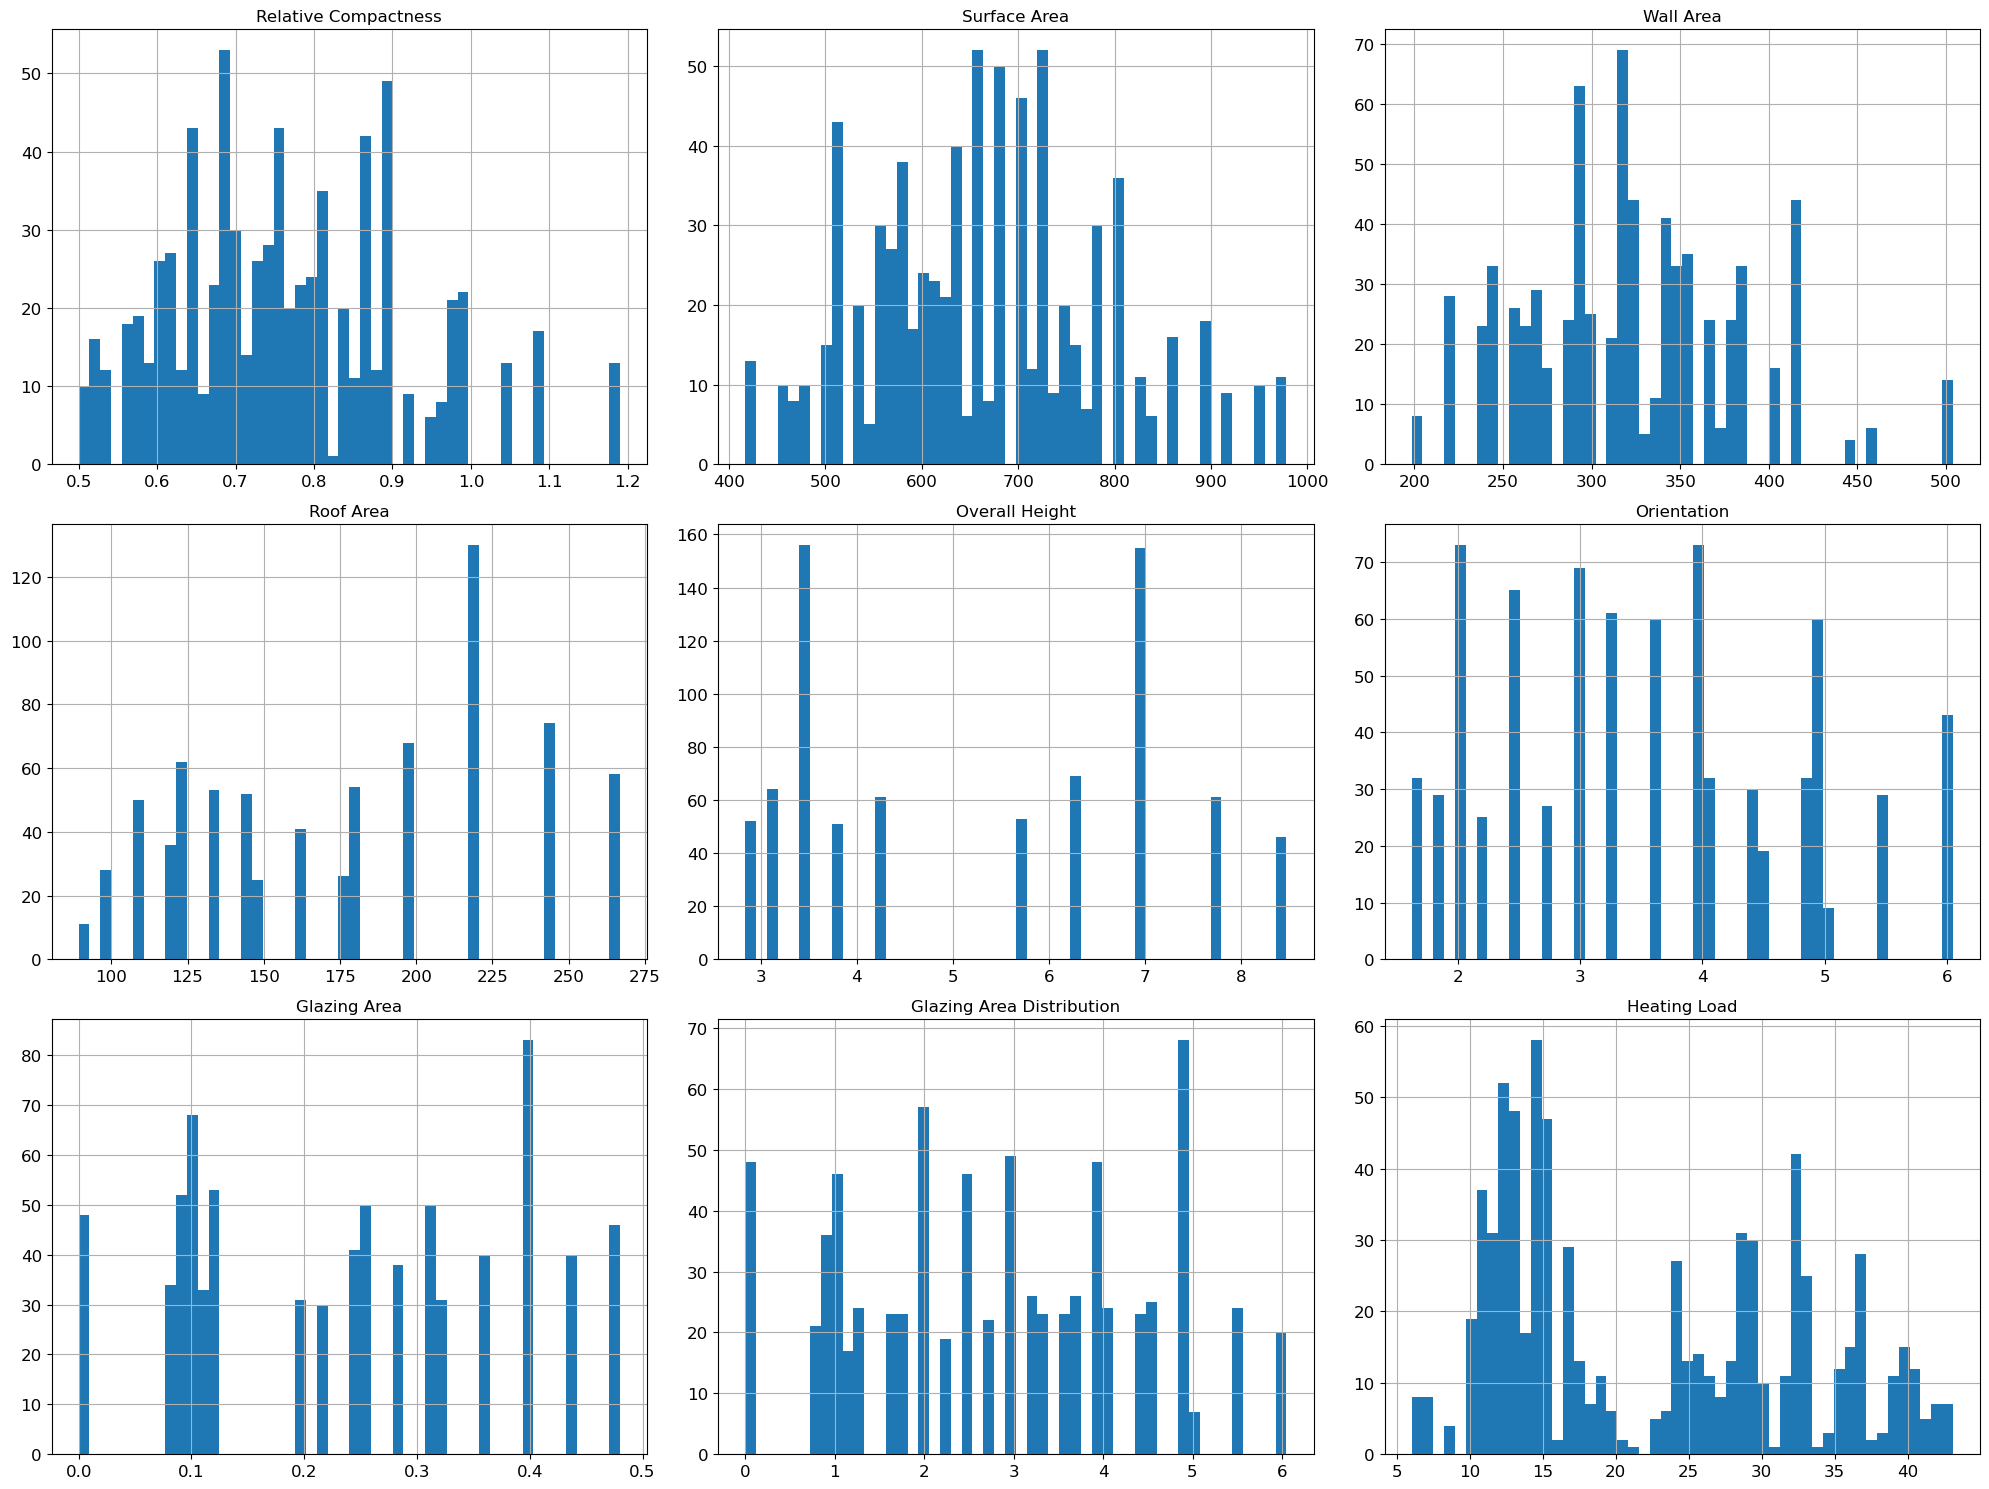

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

#### 3.5 Data Splitting

In [46]:
# Making sure that this notebook's output identical at every run
np.random.seed(42)

In [47]:
# split the data into train and test sets, with 30% test data
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset, test_size=0.3, random_state=42)

In [48]:
# Testing the test set, whether it returns date or not.
test_set.head()

,Category of the building,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
668,C2,0.68,800.42,444.68,242.55,3.47,1.98,0.32,3.63,16.47
324,C2,0.59,683.55,350.35,242.55,3.47,2.42,0.25,0.90,13.17
624,C2,0.97,509.36,291.06,121.28,5.67,1.62,0.32,2.70,32.82
690,C2,0.64,700.70,339.57,161.70,6.93,3.96,0.40,3.60,41.32
473,C1,0.77,776.16,NaN,266.80,3.47,2.97,0.25,4.40,16.69
